<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import scipy.stats as stats
import math
from scipy.stats import kruskal
import pandas as pd


from IPython.display import display,HTML

display(HTML("<style>.container {width :95% !important ;}</style>"))


from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


import seaborn as sns
sns.set_context('talk')

from sklearn.metrics import pairwise_distances_argmin_min ,r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

#from pmdarima import auto_arima

In [48]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df.head()

InvoiceNo StockCode                    Description  Quantity  \
0    565857     84879  ASSORTED COLOUR BIRD ORNAMENT        16   
1    560452     22432        WATERING CAN PINK BUNNY         6   
2    578509     22492        MINI PAINT SET VINTAGE         36   
3    579345     22728      ALARM CLOCK BAKELIKE PINK         8   
4    564039     21731  RED TOADSTOOL LED NIGHT LIGHT        12   

        InvoiceDate  UnitPrice  CustomerID  Country  
0    9/7/2011 14:13       1.69     14911.0     EIRE  
1    7/19/2011 9:51       1.95     12682.0   France  
2  11/24/2011 13:17       0.65     12705.0  Germany  
3  11/29/2011 11:46       3.75     12727.0   France  
4   8/22/2011 12:40       1.65     12645.0  Germany

#### ‚úÖ 1.1 EDA, Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ F(ÏÜåÎπÑÏûêÎ≥Ñ Íµ¨Îß§ÎπàÎèÑ), M(ÏÜåÎπÑÏûêÎ≥Ñ Ï¥ù Íµ¨Îß§Ïï°) featureÎ•º ÏÉàÎ°ú ÏÉùÏÑ±Ìï¥ÏÑú Í∑∏ Í≤∞Í≥ºÍ∞íÏúºÎ°ú ÌÉêÏÉâÏ†Å Î∂ÑÏÑù Ïã§Ïãú

In [49]:
# ÎÇ†Ïßú Ï†ÑÏ≤òÎ¶¨
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['ym'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# price ÏÉùÏÑ±
df['price'] = df['UnitPrice'] * df['Quantity']

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


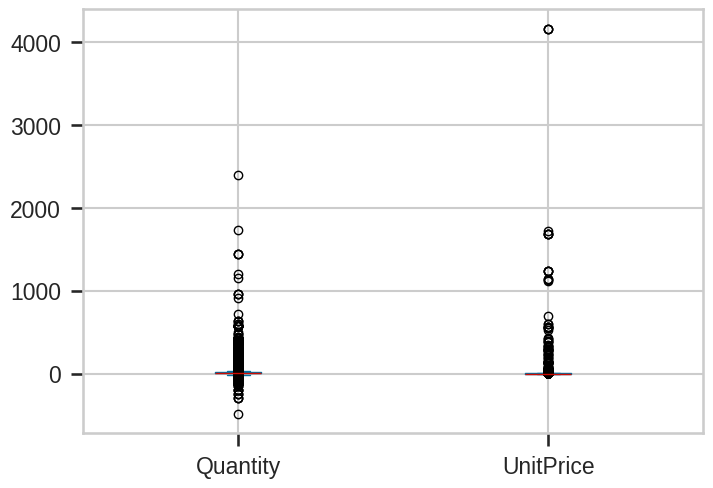

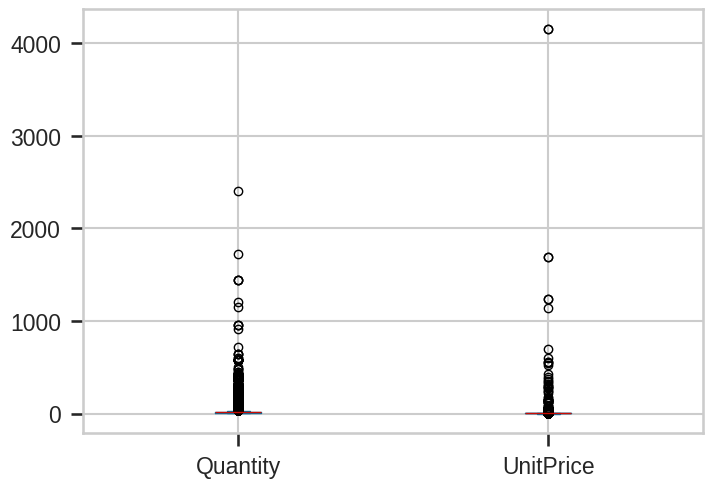

In [50]:
# 1. Ïù¥ÏÉÅÏπò Ï≤¥Í±∞ - QuantityÍ∞Ä 0Í∞ú Ïù¥ÌïòÏù∏ Í≤ÉÎì§ = Invoice Ïóê CÏù¥Î¶Ñ ÏûàÎäîÍ≤É ÏßÄÏö∞Í∏∞

# Invoice = C ÎÇ¥Ïö© ÌôïÏù∏
# df.loc[(df['InvoiceNo'].str.contains('C') == True) ] -  Î∞òÎÇ©ÏúºÎ°ú Î≥¥Ïó¨ÏßÑÎã§. QuantityÍ∞Ä Ï†ÑÎ∂Ä -Ï≤òÎ¶¨ÎêòÏñ¥ÏûàÏùå (Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£ºÌïòÍ≥† ÏÇ≠Ï†ú)

print(df[['Quantity','UnitPrice']].plot(kind = 'box'))


# 2. Ïù¥ÏÉÅÏπò ÏÇ≠Ï†ú df2
df2 = df.loc[df['InvoiceNo'].str.contains("C") == False].reset_index(drop = True)

print(df2[['Quantity','UnitPrice']].plot(kind = 'box'))



                 ID            F              M
count    345.000000   345.000000     345.000000
mean   12738.921739   115.556522    4145.790174
std      591.750760   343.590427   19255.241859
min    12348.000000     2.000000      63.000000
25%    12476.000000    23.000000     460.890000
50%    12591.000000    50.000000    1035.800000
75%    12707.000000   108.000000    2794.510000
max    17097.000000  5677.000000  280206.020000

F(ÏÜåÎπÑÏûêÎ≥Ñ Íµ¨Îß§ÎπàÎèÑ), M(ÏÜåÎπÑÏûêÎ≥Ñ Ï¥ù Íµ¨Îß§Ïï°) ÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Í≥† Ï°∞ÌöåÌï¥Î≥∏ Í≤∞Í≥º
75%ÏôÄ ÏµúÎåÄÍ∞íÏùò Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇòÎäîÍ≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. Ïù¥ÏÉÅÏπòÎ°ú ÏòàÏÉÅÎêòÎ©∞ iqrÏúºÎ°ú Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÍ≥† ClipingÏùÑ ÌÜµÌï¥ ÏÉÅÌïú,ÌïòÌïúÏúºÎ°ú Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞Î•º Ïû¨Ï°∞Ï†ïÌïúÎã§.

Ïù¥ÏÉÅÏπò Ï°∞Ï†ï Ï†Ñ
Ïù¥ÏÉÅÏπò Ï°∞Ï†ï ÌõÑ 


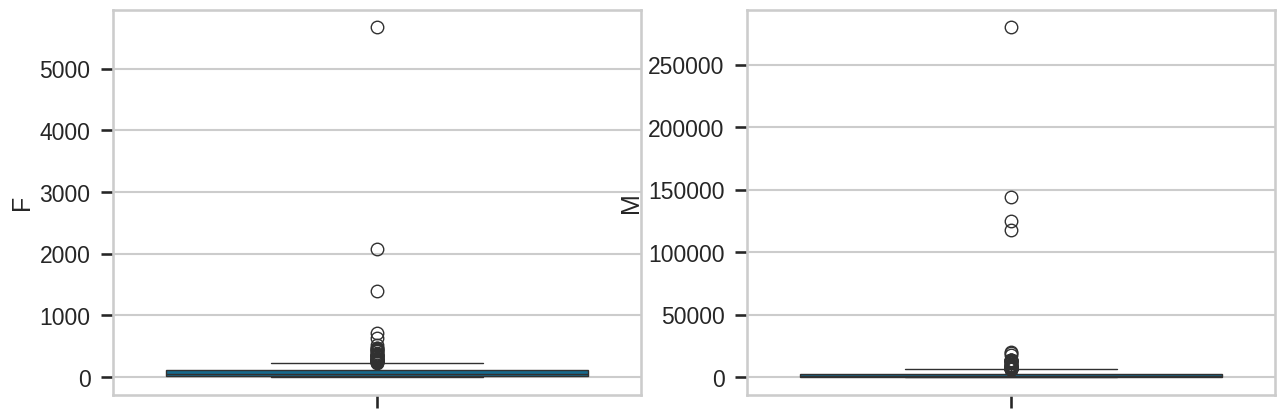

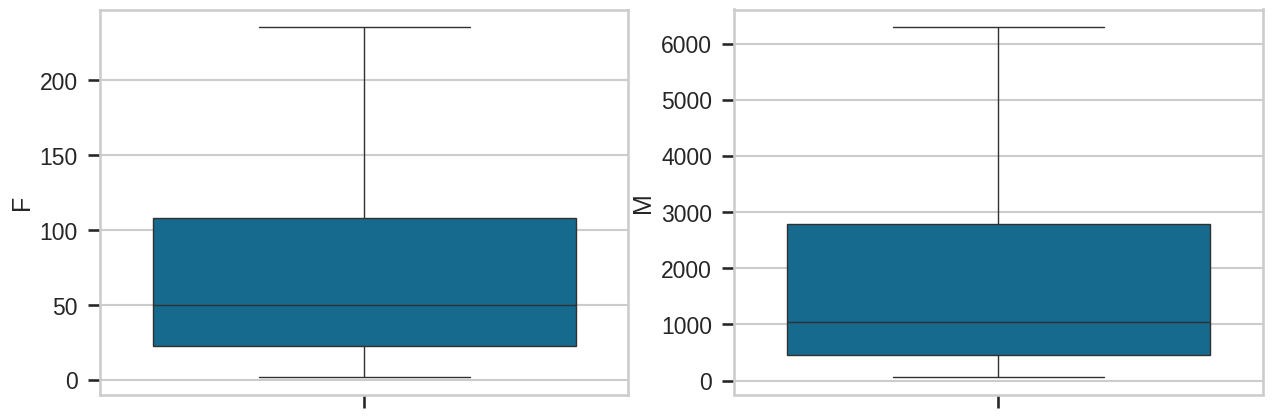

In [51]:

# 3. RFM ÏÉùÏÑ±
F = df2.groupby('CustomerID')['InvoiceDate'].size().reset_index()
M = df2.groupby('CustomerID')['price'].sum().reset_index()

fm_df = pd.merge(F, M, how= 'left', right_on= 'CustomerID', left_on = 'CustomerID')
fm_df = fm_df.rename(columns = {'CustomerID':'ID', 'InvoiceDate':'F', 'price':'M'})


# 4. EDA
cols = fm_df.columns[1:]

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, axes in enumerate(axes.flat[:]) :
  col_i = cols[i]
  sns.boxplot(fm_df[col_i],  ax = axes)

print(fm_df.describe())

print("""
F(ÏÜåÎπÑÏûêÎ≥Ñ Íµ¨Îß§ÎπàÎèÑ), M(ÏÜåÎπÑÏûêÎ≥Ñ Ï¥ù Íµ¨Îß§Ïï°) ÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Í≥† Ï°∞ÌöåÌï¥Î≥∏ Í≤∞Í≥º
75%ÏôÄ ÏµúÎåÄÍ∞íÏùò Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇòÎäîÍ≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. Ïù¥ÏÉÅÏπòÎ°ú ÏòàÏÉÅÎêòÎ©∞ iqrÏúºÎ°ú Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÍ≥† ClipingÏùÑ ÌÜµÌï¥ ÏÉÅÌïú,ÌïòÌïúÏúºÎ°ú Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞Î•º Ïû¨Ï°∞Ï†ïÌïúÎã§.
""")
print("Ïù¥ÏÉÅÏπò Ï°∞Ï†ï Ï†Ñ")
cols = fm_df.columns[1:].tolist()
def iqr(x) :
  for col in cols :
    q1 = fm_df[col].quantile(0.25)
    q3 = fm_df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    fm_df[col] = fm_df[col].clip(lower, upper)

  return fm_df.reset_index(drop = True)

fm_df_outlier = iqr(fm_df)


fig, axes = plt.subplots(1, 2, figsize = (15, 5))

print("Ïù¥ÏÉÅÏπò Ï°∞Ï†ï ÌõÑ ")
for i, axes in enumerate(axes.flat[:]) :
  col_i = cols[i]
  sns.boxplot(fm_df_outlier[col_i],  ax = axes)

‚úÖ 1.2 F, M Í∏∞Î∞òÏúºÎ°ú Íµ∞Ïßë Î∂ÑÏÑù Ïã§Ìñâ


Elbow Í∑∏ÎûòÌîÑÏóêÏÑú 2ÏóêÏÑú Í∏âÍ≤©ÌïòÍ≤å Í∞êÏÜåÌïú ÌõÑ, 3ÏóêÏÑú ÏôÑÎßåÌï¥ÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÎÇòÌÉÄÎÇúÎã§.
Ïã§Î£®Ïó£ Ï†êÏàòÏóêÏÑúÎäî K=2ÏùºÎïå Í∞ÄÏû• ÎÜíÏßÄÎßå, ÏóòÎ≥¥Ïö∞ Í∑∏ÎûòÌîÑÎ•º Í≥†Î†§ÌïòÏó¨ Ï†ÅÏ†àÌïú Íµ∞Ïßë Í∞ØÏàòÎ•º 3ÏúºÎ°ú ÏßÄÏ†ïÌïúÎã§.



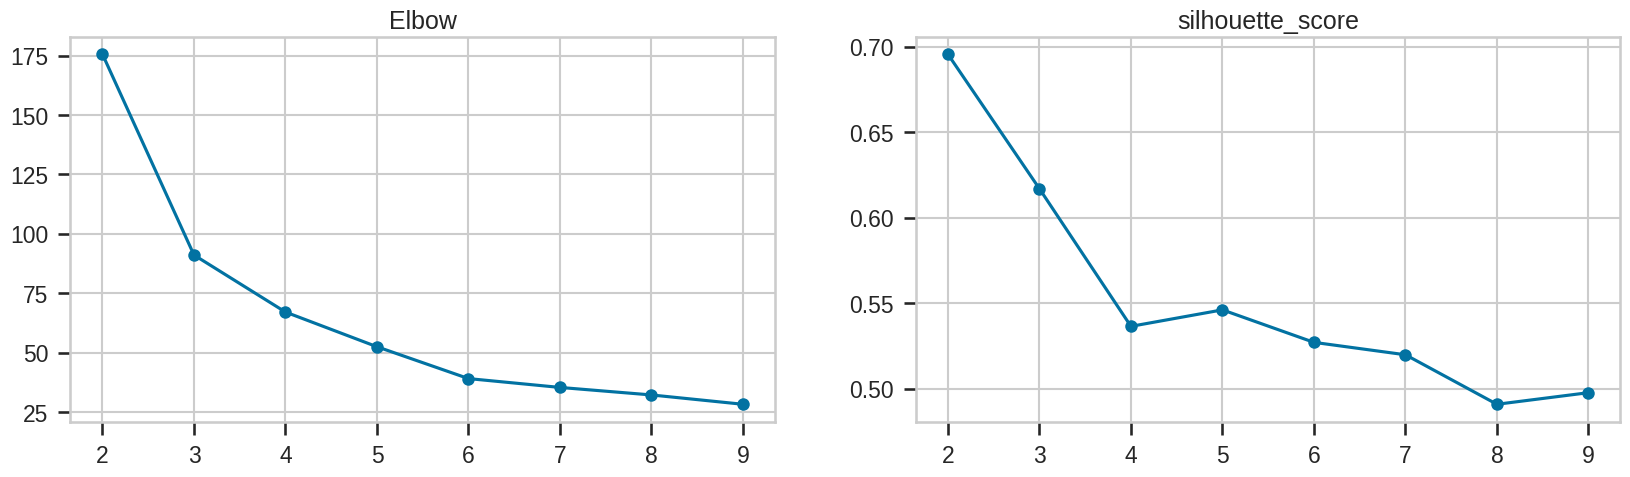

In [52]:
# Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìïú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö© fm_df_outlier
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score , pairwise_distances
from sklearn.preprocessing import StandardScaler

kmean_df = fm_df_outlier.iloc[:,1:]

ss = StandardScaler()
kmean_df = pd.DataFrame(ss.fit_transform(kmean_df), columns = kmean_df.columns)

elbow = []
sil = []
iner = []
for k in range(2, 10) :
  km = KMeans(n_clusters= k, random_state = 455)
  km.fit(kmean_df)

  # ÏùëÏßëÎèÑÎ•º ÏúÑÌïú LIST
  iner.append(km.inertia_)

  elbow.append(km.inertia_)
  sil.append(silhouette_score(kmean_df, km.labels_))

fig, axes = plt.subplots(1,2, figsize = (20,5))


axes[0].plot(range(2, 10), elbow, marker = 'o')
axes[0].set_title('Elbow')
axes[1].plot(range(2, 10), sil, marker ='o')
axes[1].set_title('silhouette_score')

print("""
Elbow Í∑∏ÎûòÌîÑÏóêÏÑú 2ÏóêÏÑú Í∏âÍ≤©ÌïòÍ≤å Í∞êÏÜåÌïú ÌõÑ, 3ÏóêÏÑú ÏôÑÎßåÌï¥ÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÎÇòÌÉÄÎÇúÎã§.
Ïã§Î£®Ïó£ Ï†êÏàòÏóêÏÑúÎäî K=2ÏùºÎïå Í∞ÄÏû• ÎÜíÏßÄÎßå, ÏóòÎ≥¥Ïö∞ Í∑∏ÎûòÌîÑÎ•º Í≥†Î†§ÌïòÏó¨ Ï†ÅÏ†àÌïú Íµ∞Ïßë Í∞ØÏàòÎ•º 3ÏúºÎ°ú ÏßÄÏ†ïÌïúÎã§.
""")


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

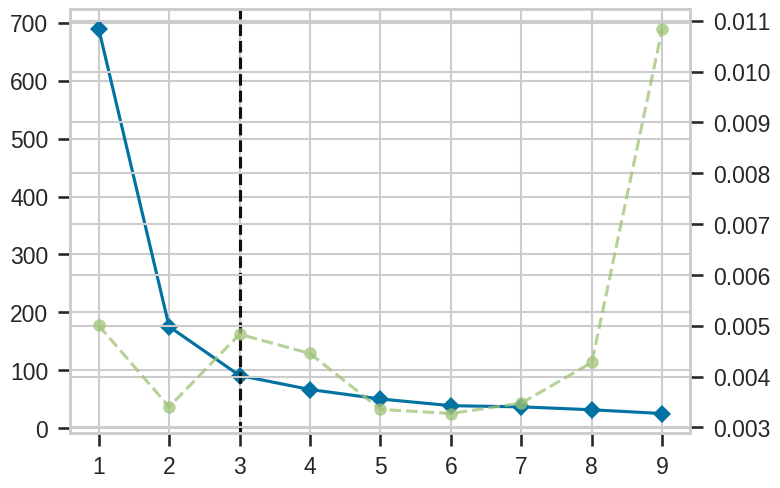

In [53]:

from yellowbrick.cluster import KElbowVisualizer
kmean = KMeans()
visual = KElbowVisualizer(kmean, k=(1, 10))
visual.fit(kmean_df)

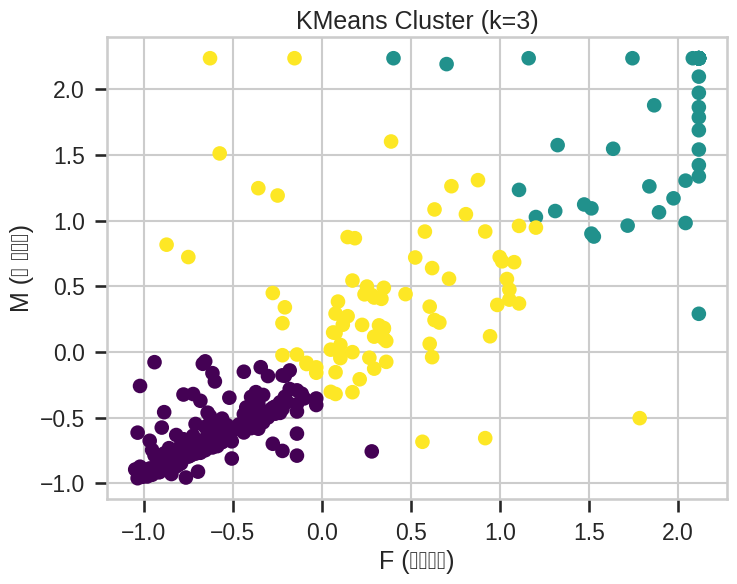

In [54]:
# K= 3 Íµ∞Ïßë
km3 = KMeans(n_clusters= 3, random_state = 455)
km3.fit(kmean_df)
kmean_df['label'] = km3.labels_

# ÏµúÏ¢Ö Íµ∞ÏßëÏùò ÏÇ∞Ï†êÎèÑ
plt.figure(figsize =(8,6))
plt.scatter(kmean_df['F'], kmean_df['M'] , c = kmean_df['label'] ,cmap='viridis')
plt.xlabel('F (Íµ¨Îß§ÎπàÎèÑ)')
plt.ylabel('M (Ï¥ù Íµ¨Îß§Ïï°)')
plt.title('KMeans Cluster (k=3)')
plt.show()

‚úÖ  1.3 Íµ∞Ïßë Í≤∞Í≥ºÏùò Ï†ÅÌï©ÏÑ±ÏùÑ Íµ∞Ïßë ÎÇ¥ ÏùëÏßëÎèÑ, Íµ∞Ïßë Í∞Ñ Î∂ÑÎ¶¨ÎèÑÏùò Í∞úÎÖêÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú ÏÑúÏà†

In [55]:
# ÏùëÏßëÎèÑ (inertia)
inertia = km3.inertia_
print("K = 3 ÏùºÎïåÏùò ÏùëÏßëÎèÑ")
print(inertia)
print("K ÏÑ†Ï†ïÏãú, 2-10ÍπåÏßÄÏùò ÏùëÏßëÎèÑ Î¶¨Ïä§Ìä∏")
print(iner)

# Î∂ÑÎ¶¨ÎèÑ : Í∞Å Íµ∞ÏßëÏùò Ï§ëÏã¨Í∞Ñ ÌèâÍ∑† Í±∞Î¶¨ Í≥ÑÏÇ∞
center = km3.cluster_centers_
matrix = pairwise_distances_argmin_min(center, kmean_df[['F','M']])[1]
sep = sum(matrix) / len(matrix)

print("Î∂ÑÎ¶¨ÎèÑ")
print(sep)

print("""
1. Íµ∞Ïßë ÎÇ¥ ÏùëÏßëÎèÑ
   Í∞ôÏùÄ Íµ∞ÏßëÏóê ÏÜçÌïú Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ ÏÑúÎ°ú ÏñºÎßàÎÇò Í∞ÄÍπåÏù¥ Î™®Ïó¨ÏûàÎäîÏßÄ ÏÑ§Î™Ö
   ÏàòÏπòÏ†ÅÏúºÎ°úÎäî Í∞Å Íµ∞Ïßë ÎÇ¥Ïùò Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Îì§ Í∞ÑÏùò Í±∞Î¶¨Í∞Ä Ï†ÅÍ±∞ÎÇò, Íµ∞Ïßë ÎÇ¥ Î∂ÑÏÇ∞ (inertia)Í∞Ä ÎÇÆÏùÑ ÏàòÎ°ù ÎÜíÏùÄ ÏùëÏßëÎèÑ
2. Íµ∞Ïßë Í∞Ñ Î∂ÑÎ¶¨ÎèÑ
   Í∞ÅÍ∞Å Íµ∞ÏßëÏùò Í±∞Î¶¨Í∞Ä ÏñºÎßàÎÇò Î™ÖÌôïÌïúÏßÄ ÌôïÏù∏ÌïòÎäî Í≤ÉÏúºÎ°ú, Íµ∞ÏßëÍ∞Ñ Ï§ëÏã¨Í∞Ñ Í±∞Î¶¨Í∞Ä ÌÅ¨Í±∞ÎÇò, Í≤πÏπ®Ïù¥ Ï†ÅÏùÑ ÏàòÎ°ù ÎÜíÏùÄ Î∂ÑÎ¶¨ÎèÑÎ•º Í∞ÄÏßÑÎã§Í≥† Ìï† Ïàò ÏûàÎã§.

   """)

K = 3 ÏùºÎïåÏùò ÏùëÏßëÎèÑ
91.11862058447971
K ÏÑ†Ï†ïÏãú, 2-10ÍπåÏßÄÏùò ÏùëÏßëÎèÑ Î¶¨Ïä§Ìä∏
[175.5618273586192, 91.11862058447971, 67.12919709529562, 52.54032167872345, 39.14577745518624, 35.42754069131135, 32.26389397305421, 28.342604407418527]
Î∂ÑÎ¶¨ÎèÑ
0.02248272029611544

1. Íµ∞Ïßë ÎÇ¥ ÏùëÏßëÎèÑ
   Í∞ôÏùÄ Íµ∞ÏßëÏóê ÏÜçÌïú Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ ÏÑúÎ°ú ÏñºÎßàÎÇò Í∞ÄÍπåÏù¥ Î™®Ïó¨ÏûàÎäîÏßÄ ÏÑ§Î™Ö
   ÏàòÏπòÏ†ÅÏúºÎ°úÎäî Í∞Å Íµ∞Ïßë ÎÇ¥Ïùò Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Îì§ Í∞ÑÏùò Í±∞Î¶¨Í∞Ä Ï†ÅÍ±∞ÎÇò, Íµ∞Ïßë ÎÇ¥ Î∂ÑÏÇ∞ (inertia)Í∞Ä ÎÇÆÏùÑ ÏàòÎ°ù ÎÜíÏùÄ ÏùëÏßëÎèÑ
2. Íµ∞Ïßë Í∞Ñ Î∂ÑÎ¶¨ÎèÑ
   Í∞ÅÍ∞Å Íµ∞ÏßëÏùò Í±∞Î¶¨Í∞Ä ÏñºÎßàÎÇò Î™ÖÌôïÌïúÏßÄ ÌôïÏù∏ÌïòÎäî Í≤ÉÏúºÎ°ú, Íµ∞ÏßëÍ∞Ñ Ï§ëÏã¨Í∞Ñ Í±∞Î¶¨Í∞Ä ÌÅ¨Í±∞ÎÇò, Í≤πÏπ®Ïù¥ Ï†ÅÏùÑ ÏàòÎ°ù ÎÜíÏùÄ Î∂ÑÎ¶¨ÎèÑÎ•º Í∞ÄÏßÑÎã§Í≥† Ìï† Ïàò ÏûàÎã§.

   


‚úÖ 1.4 Ï†ÅÌï©Îêú Íµ∞Ïßë Î≥Ñ ÌäπÏÑ±Ïóê ÎåÄÌïú ÏùòÍ≤¨Í≥º ÎπÑÏ¶àÎãàÏä§Ï†Å ÌåêÎã® Ï†úÏãú

label           F            M
0      0   30.908213   648.778454
1      1  219.473684  5512.491404
2      2  104.333333  2710.768148

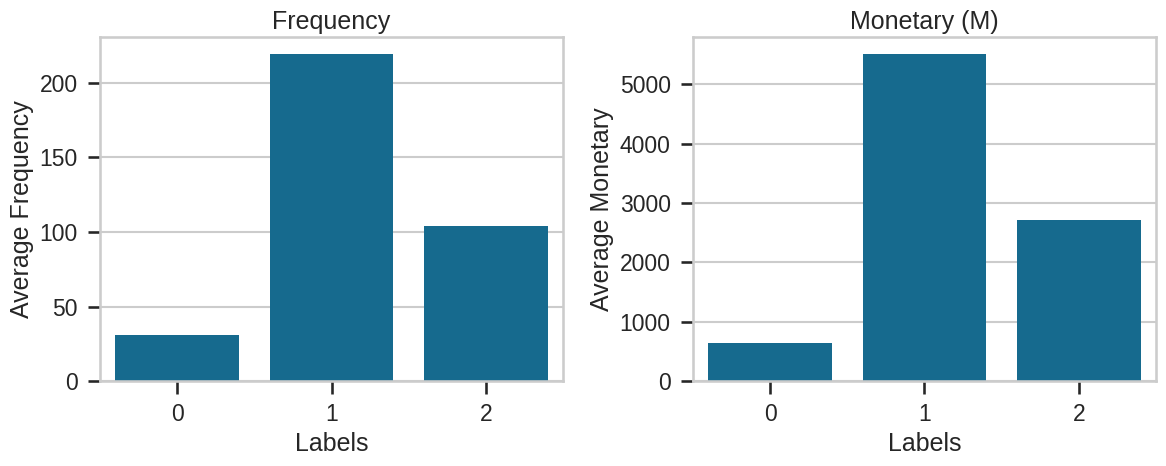


[Íµ∞Ïßë 0]
  - Íµ¨Îß§ÎπàÎèÑÏôÄ Íµ¨Îß§Ïï°Ïóê ÎÇÆÏùÄ Í∑∏Î£πÏúºÎ°ú, Í∞ÄÎÅî Íµ¨Îß§ÌïòÎäî Í≥†Í∞ùÎì§Ïù¥ Ìè¨Ìï®ÎêúÎã§.
  - Îçî ÎßéÏùÄ Î∞©Î¨∏Í≥º Íµ¨Îß§ÏùÑ ÎèÖÎ†§ÌïòÍ∏∞ ÏúÑÌïú ÌîÑÎ°úÎ™®ÏÖòÏù¥ÎÇò ÌñâÏÇ¨Î•º Ï†úÍ≥µÌï¥ Í≥†Í∞ùÎì§Ïù¥ ÌôúÎèôÏóê Îçî Ï†ÅÍ∑πÏ†ÅÏúºÎ°ú Í∞ÄÎã¥ÌïòÎèÑÎ°ù Ï†ÑÎûµÏùÑ ÏÑ∏Ïö¥Îã§.

[Íµ∞Ïßë 1]
  - Íµ¨Îß§ ÎπàÎèÑÏôÄ Íµ¨Îß§Ïï° Î™®Îëê ÎÜíÏùÄ ÏßëÎã®ÏúºÎ°ú, ÌïµÏã¨ Í≥†Í∞ùÎì§Î°ú ÏßÄÏ†ïÎê† Ïàò ÏûàÏúºÎ©∞, VIP ÏÑ†Ï†ïÏùÑ ÌÜµÌïú ÏÑúÎπÑÏä§ Ï†úÍ≥µÏù¥ÎÇò Ï∂©ÏÑ±ÎèÑÎ•º Îçî ÎÜíÌûê Ïàò ÏûàÎäî Î∞©ÏïàÏùÑ ÏÑ∏Ïö¥Îã§.

[Íµ∞Ïßë 2]
  - Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò Íµ¨Îß§ÌôúÎèôÏùÑ Î≥¥Ïù¥Îäî Í≥†Í∞ùÎì§ÏùÄ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÏóÖÏÖÄÎßÅÏù¥ÎÇò ÍµêÏ∞® ÌåêÎß§Î•º ÌÜµÌï¥ Îß§Ï∂ú Ï¶ùÎåÄÍ∞Ä Í∞ÄÎä•Ìï† Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§.



In [56]:
fm_df_outlier['label'] = km3.labels_
cluster_mean = fm_df_outlier.groupby('label')[['F','M']].mean().reset_index()
display(cluster_mean)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x='label', y='F', data=cluster_mean, ax=axes[0])
axes[0].set_title('Frequency')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Average Frequency')

sns.barplot(x='label', y='M', data=cluster_mean, ax=axes[1])
axes[1].set_title('Monetary (M)')
axes[1].set_xlabel('Labels')
axes[1].set_ylabel('Average Monetary')

plt.tight_layout()
plt.show()

print("""
[Íµ∞Ïßë 0]
  - Íµ¨Îß§ÎπàÎèÑÏôÄ Íµ¨Îß§Ïï°Ïóê ÎÇÆÏùÄ Í∑∏Î£πÏúºÎ°ú, Í∞ÄÎÅî Íµ¨Îß§ÌïòÎäî Í≥†Í∞ùÎì§Ïù¥ Ìè¨Ìï®ÎêúÎã§.
  - Îçî ÎßéÏùÄ Î∞©Î¨∏Í≥º Íµ¨Îß§ÏùÑ ÎèÖÎ†§ÌïòÍ∏∞ ÏúÑÌïú ÌîÑÎ°úÎ™®ÏÖòÏù¥ÎÇò ÌñâÏÇ¨Î•º Ï†úÍ≥µÌï¥ Í≥†Í∞ùÎì§Ïù¥ ÌôúÎèôÏóê Îçî Ï†ÅÍ∑πÏ†ÅÏúºÎ°ú Í∞ÄÎã¥ÌïòÎèÑÎ°ù Ï†ÑÎûµÏùÑ ÏÑ∏Ïö¥Îã§.

[Íµ∞Ïßë 1]
  - Íµ¨Îß§ ÎπàÎèÑÏôÄ Íµ¨Îß§Ïï° Î™®Îëê ÎÜíÏùÄ ÏßëÎã®ÏúºÎ°ú, ÌïµÏã¨ Í≥†Í∞ùÎì§Î°ú ÏßÄÏ†ïÎê† Ïàò ÏûàÏúºÎ©∞, VIP ÏÑ†Ï†ïÏùÑ ÌÜµÌïú ÏÑúÎπÑÏä§ Ï†úÍ≥µÏù¥ÎÇò Ï∂©ÏÑ±ÎèÑÎ•º Îçî ÎÜíÌûê Ïàò ÏûàÎäî Î∞©ÏïàÏùÑ ÏÑ∏Ïö¥Îã§.

[Íµ∞Ïßë 2]
  - Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò Íµ¨Îß§ÌôúÎèôÏùÑ Î≥¥Ïù¥Îäî Í≥†Í∞ùÎì§ÏùÄ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÏóÖÏÖÄÎßÅÏù¥ÎÇò ÍµêÏ∞® ÌåêÎß§Î•º ÌÜµÌï¥ Îß§Ï∂ú Ï¶ùÎåÄÍ∞Ä Í∞ÄÎä•Ìï† Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§.
""")

#### ‚úÖ 2.1 ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù : EDA

In [57]:
from scipy import interpolate  # Í≤∞Ï∏°Ïπò - Î≥¥Í∞ÑÎ≤ï

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf


# ÏãúÍ≥ÑÏó¥ ÏãúÍ∞ÅÌôî
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import itertools

In [58]:
#!pip uninstall numpy pmdarima -y
#!pip install numpy==1.23.5
#!pip install pmdarima

from pmdarima import auto_arima

In [59]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem2.csv',index_col = 0)
df.head()
len(df)

300

<Axes: >

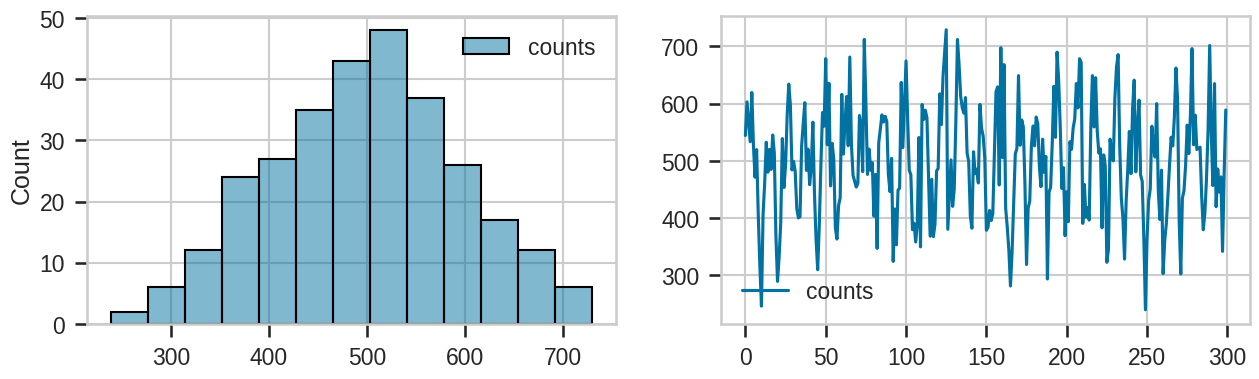

In [60]:
import matplotlib.pyplot as plt # Import the necessary library

#2023-01-01 ~ 2100-01-01 ÏÉùÏÑ±
# MS : Í∞Å ÏõîÏùò Ï≤´ Î≤àÏ®∞ÎÇ† Í∏∞Ï§ÄÏùò ÎÇ†Ïßú Î≤îÏúÑ
# D : Îß§Ïùº
# W : Îß§Ï£º ÏùºÏöîÏùº
# M : Îß§Ïõî ÎßêÏùº
# Q : Î∂ÑÍ∏∞ ÎßêÏùº
# QS : Î∂ÑÍ∏∞ ÏãúÏûëÏùº
# A : Ïó∞Îßê
# AS : Ïó∞Ï¥à

df['date']= pd.date_range(start = '2023-01-01' , end = '2100-01-01', freq = 'MS')[:300]


fig, ax = plt.subplots(1,2, figsize = (15, 4))
sns.histplot(df.dropna(), ax = ax[0])
sns.lineplot(df)

#### ‚úÖ 2.2 ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù : Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ÏôÄ Ìï¥Îãπ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞©Ïãù

In [61]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print(df.isna().sum())

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞©Î≤ï interplotate Î≥¥Í∞ÑÎ≤ïÏùÑ ÏÇ¨Ïö©
df1 = df.interpolate(method = 'linear')

print("""
Îã®ÏàúÌûà Í≤∞Ï∏°ÏπòÎ•º ÌèâÍ∑†Í≥º ÏµúÎπàÍ∞íÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ≤å ÎêòÎ©¥ ÏãúÍ≥ÑÏó¥ Íµ¨Ï°∞Ïùò (Ï∂îÏÑ∏, Í≥ÑÏ†àÏÑ±)Îì±Ïùò ÌäπÏßïÏù¥ ÏôúÍ≥° Îê† Ïàò ÏûàÎã§.
Î≥¥Í∞ÑÎ≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÎåÄÌïú Í∏∞Ï°¥ ÏãúÍ≥ÑÏó¥Ïùò ÌäπÏßïÏùÑ Ïú†ÏßÄÌïòÏó¨, Î™®Îç∏Ïùò ÏÑ±Îä• Ï†ÄÌïòÎ•º ÎßâÎäîÎã§.
""")

counts    5
date      0
dtype: int64

Îã®ÏàúÌûà Í≤∞Ï∏°ÏπòÎ•º ÌèâÍ∑†Í≥º ÏµúÎπàÍ∞íÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ≤å ÎêòÎ©¥ ÏãúÍ≥ÑÏó¥ Íµ¨Ï°∞Ïùò (Ï∂îÏÑ∏, Í≥ÑÏ†àÏÑ±)Îì±Ïùò ÌäπÏßïÏù¥ ÏôúÍ≥° Îê† Ïàò ÏûàÎã§.
Î≥¥Í∞ÑÎ≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÎåÄÌïú Í∏∞Ï°¥ ÏãúÍ≥ÑÏó¥Ïùò ÌäπÏßïÏùÑ Ïú†ÏßÄÌïòÏó¨, Î™®Îç∏Ïùò ÏÑ±Îä• Ï†ÄÌïòÎ•º ÎßâÎäîÎã§.



#### ‚úÖ 2. 3 Í≥ÑÏ†àÏÑ±ÏùÑ Î∞òÏòÅÌïú ÏãúÍ≥ÑÏó¥ Î™®Îç∏ÏùÑ Ï†úÏãúÌïòÍ≥† Ï†ïÌôïÎèÑ Ï∏°Î©¥ÏóêÏÑú Î™®Îç∏ ÏÑ±Îä•

0.006615010539597648


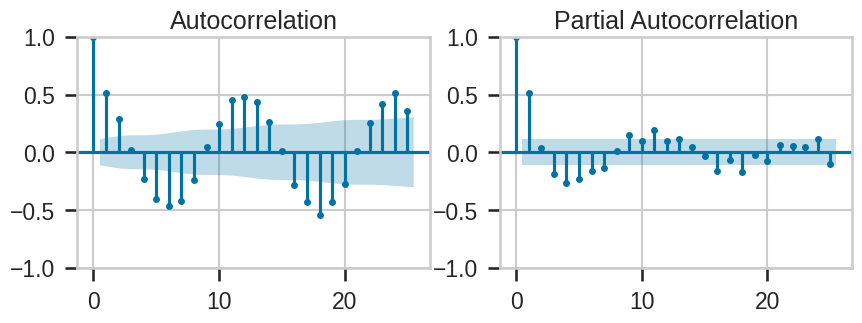


ACF : ÏûêÍ∏∞ ÏÉÅÍ¥ÄÏÑ±ÏùÑ ÎÇòÌÉÄÎÉÑ, lag 2~ 4ÏóêÏÑú Ï†êÏ†ê Í∞êÏÜåÌïòÏó¨ +/-Ïùò Ï£ºÍ∏∞Ï†ÅÏù∏ Ìå®ÌÑ¥Ïù¥ Ï°¥Ïû¨ÌïúÎã§.
      Ïó¨Îü¨ Íµ¨Í∞ÑÏóêÏÑú ÌååÎûÄÏÉâ ÏûÑÍ≥ÑÏòÅÏó≠ÏùÑ Î≤óÏñ¥ÎÇòÎäî Í≤ÉÏúºÎ°ú Î¥ê, ÏûêÍ∏∞ ÏÉÅÍ¥ÄÏù¥ ÏûàÎã§.
      MA(q) ÏÑ†Ï†ï - Lag 1ÏóêÏÑú ÌÅ¨Í≤å Îñ®Ïñ¥ÏßÄÍ≥† Ï†êÏ∞®Ï†ÅÏúºÎ°ú ÏßÑÎèôÌïòÍ∏∞ ÎïåÎ¨∏Ïóê MA(1) ÌòπÏùÄ MA(2)

PACF : Lag 1ÏóêÏÑúÏùò ÎöúÎ†∑Ìïú Ïä§ÌååÏù¥ÌÅ¨Î•º Ï†úÏô∏ÌïòÍ≥†Îäî ÏïΩÌïú ÏßÑÎèôÌè≠ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê ÏûêÍ∏∞ ÌöåÍ∑Ä ÏÑ±Î∂ÑÏùÄ ÌÅ¨ÏßÄ ÏïäÏïÑÎ≥¥Ïù∏Îã§.
      AR(p) ÏÑ†ÏÑ± : Lag 1ÏóêÏÑú ÎöúÎ†∑ÌïòÍ≤å ÎÅäÍ∏∞Í≥† Ïù¥ÌõÑÏóêÎäî Îπ†Î•¥Í≤å Í∞êÏÜåÌïòÎäî Í≤ÉÏùÑ Î≥¥ÏïÑ Ï†ÑÌòïÏ†ÅÏù∏ AR(1)




In [62]:
r_df = df1.set_index('date')

# 1) Ï†ïÏÉÅÏÑ± ÌôïÏù∏ - Adfuller
# Í∑ÄÎ¨¥ : ÎπÑÏ†ïÏÉÅÏù¥Îã§
# ÎåÄÎ¶Ω : Ï†ïÏÉÅÏù¥Îã§.

ad = adfuller(r_df, regression= 'c', autolag = 'AIC')
print(ad[1])


fig, ax = plt.subplots(1,2, figsize=(10,3))
plot_acf(r_df, ax=ax[0])
plot_pacf(r_df, ax=ax[1])
plt.show()

print("""
ACF : ÏûêÍ∏∞ ÏÉÅÍ¥ÄÏÑ±ÏùÑ ÎÇòÌÉÄÎÉÑ, lag 2~ 4ÏóêÏÑú Ï†êÏ†ê Í∞êÏÜåÌïòÏó¨ +/-Ïùò Ï£ºÍ∏∞Ï†ÅÏù∏ Ìå®ÌÑ¥Ïù¥ Ï°¥Ïû¨ÌïúÎã§.
      Ïó¨Îü¨ Íµ¨Í∞ÑÏóêÏÑú ÌååÎûÄÏÉâ ÏûÑÍ≥ÑÏòÅÏó≠ÏùÑ Î≤óÏñ¥ÎÇòÎäî Í≤ÉÏúºÎ°ú Î¥ê, ÏûêÍ∏∞ ÏÉÅÍ¥ÄÏù¥ ÏûàÎã§.
      MA(q) ÏÑ†Ï†ï - Lag 1ÏóêÏÑú ÌÅ¨Í≤å Îñ®Ïñ¥ÏßÄÍ≥† Ï†êÏ∞®Ï†ÅÏúºÎ°ú ÏßÑÎèôÌïòÍ∏∞ ÎïåÎ¨∏Ïóê MA(1) ÌòπÏùÄ MA(2)

PACF : Lag 1ÏóêÏÑúÏùò ÎöúÎ†∑Ìïú Ïä§ÌååÏù¥ÌÅ¨Î•º Ï†úÏô∏ÌïòÍ≥†Îäî ÏïΩÌïú ÏßÑÎèôÌè≠ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê ÏûêÍ∏∞ ÌöåÍ∑Ä ÏÑ±Î∂ÑÏùÄ ÌÅ¨ÏßÄ ÏïäÏïÑÎ≥¥Ïù∏Îã§.
      AR(p) ÏÑ†ÏÑ± : Lag 1ÏóêÏÑú ÎöúÎ†∑ÌïòÍ≤å ÎÅäÍ∏∞Í≥† Ïù¥ÌõÑÏóêÎäî Îπ†Î•¥Í≤å Í∞êÏÜåÌïòÎäî Í≤ÉÏùÑ Î≥¥ÏïÑ Ï†ÑÌòïÏ†ÅÏù∏ AR(1)

""")

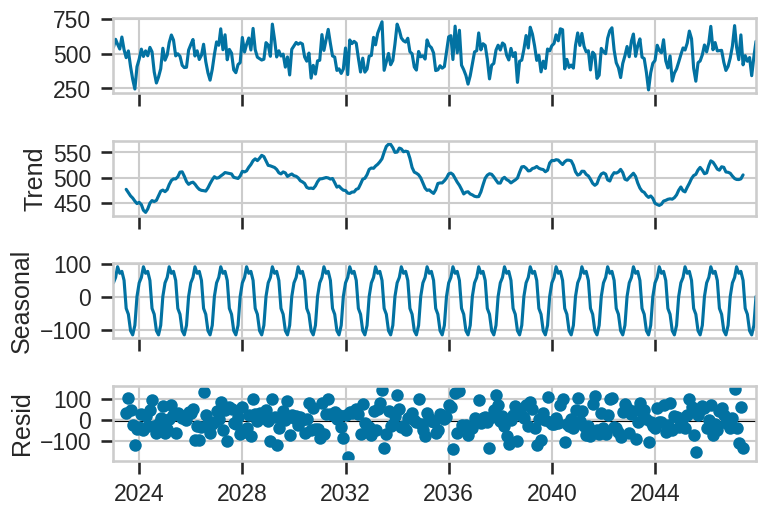


Ï†ïÏÉÅÏÑ± ÌÖåÏä§Ìä∏ÏóêÏÑúÎäî p-value Í∞Ä Ï†ïÏÉÅÏÑ±ÏùÑ ÎßåÏ°±ÌïúÎã§Í≥† ÌèâÍ∞ÄÎêòÏóàÏßÄÎßå, ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥Î•º Î≥¥Î©¥, ÏùºÏ†ï ÏßÑÌè≠ÏùÑ Í∞ÄÏßÄÎäî
Í≥ÑÏ†ïÏÑ±Í≥º Ï∂îÏÑ∏Î•º Í∞ÄÏßÄÍ≥† ÏûàÎã§. Íµ¨Ï°∞Ï†ÅÏúºÎ°úÎäî ÎπÑÏ†ïÏÉÅÏ≤òÎüº Î≥¥Ïù¥ÏßÄÎßå, Í∑∏ Î≥ÄÌôîÍ∞Ä ÏùºÏ†ïÌïòÍ≥† ÏûîÏ∞®Í∞Ä ÌèâÍ∑† 0ÏùÑ Ï§ëÏã¨ÏúºÎ°ú
Í≥®Í≥†Î£® ÌçºÏ†∏ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ÏùÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ï†ïÏÉÅÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïó¨ÏßÑÎã§. Ï¶â,
Íµ¨Ï°∞Ï†Å ÎπÑÏ†ïÏÉÅÏ†ÅÏúºÎ°ú Î≥¥Ïù¥ÏßÄÎßå, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ï†ïÏÉÅÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎäî ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïù¥Îã§. ÎπÑÎ°ù Ï†ïÏÉÅÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎçîÎùºÎèÑ
Î™®Îç∏Ïùò ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ Ï∞®Î∂Ñ/Î≥ÄÌôòÏùÑ ÌÜµÌïú Ï†ÑÏ≤òÎ¶¨Î°ú Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Îäî Í≤ÉÏù¥ Ï¢ãÏùÑ Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§.



In [63]:

# 2) ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥
d = sm.tsa.seasonal_decompose(r_df)
d.plot()
plt.show()

print("""
Ï†ïÏÉÅÏÑ± ÌÖåÏä§Ìä∏ÏóêÏÑúÎäî p-value Í∞Ä Ï†ïÏÉÅÏÑ±ÏùÑ ÎßåÏ°±ÌïúÎã§Í≥† ÌèâÍ∞ÄÎêòÏóàÏßÄÎßå, ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥Î•º Î≥¥Î©¥, ÏùºÏ†ï ÏßÑÌè≠ÏùÑ Í∞ÄÏßÄÎäî
Í≥ÑÏ†ïÏÑ±Í≥º Ï∂îÏÑ∏Î•º Í∞ÄÏßÄÍ≥† ÏûàÎã§. Íµ¨Ï°∞Ï†ÅÏúºÎ°úÎäî ÎπÑÏ†ïÏÉÅÏ≤òÎüº Î≥¥Ïù¥ÏßÄÎßå, Í∑∏ Î≥ÄÌôîÍ∞Ä ÏùºÏ†ïÌïòÍ≥† ÏûîÏ∞®Í∞Ä ÌèâÍ∑† 0ÏùÑ Ï§ëÏã¨ÏúºÎ°ú
Í≥®Í≥†Î£® ÌçºÏ†∏ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ÏùÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ï†ïÏÉÅÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïó¨ÏßÑÎã§. Ï¶â,
Íµ¨Ï°∞Ï†Å ÎπÑÏ†ïÏÉÅÏ†ÅÏúºÎ°ú Î≥¥Ïù¥ÏßÄÎßå, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ï†ïÏÉÅÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎäî ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïù¥Îã§. ÎπÑÎ°ù Ï†ïÏÉÅÏÑ±ÏùÑ ÎßåÏ°±ÌïòÎçîÎùºÎèÑ
Î™®Îç∏Ïùò ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ Ï∞®Î∂Ñ/Î≥ÄÌôòÏùÑ ÌÜµÌïú Ï†ÑÏ≤òÎ¶¨Î°ú Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Îäî Í≤ÉÏù¥ Ï¢ãÏùÑ Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§.
""")

In [64]:
from pmdarima import auto_arima

train = r_df.iloc[:276]
test = r_df.iloc[-24:]


auto_arima(train, start_p=1, start_q=1, max_p=5, max_q=5, start_P=0, start_Q=0, max_P=5, max_Q=5, m=7,
           seasonal=True, trace=False, error_action='warn', suppress_warnings=True)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 0, 7),
      suppress_warnings=True)

In [89]:
# Í≥ÑÏ†àÏÑ±ÏùÑ Î∞òÏòÅÌïú ÏãúÍ≥ÑÏó¥ Î™®Îç∏ÏùÑ ÏúÑÌï¥ SARIMA Î™®Îç∏ÏùÑ Ï†úÏãú
# Ï†ïÌôïÎèÑ Ï∏°Ï†ï : RMSE, MAPE, MAE, R2_score ÏßÄÌëúÎ°ú ÏÑ±Îä• ÎπÑÍµê
from sklearn.metrics import mean_absolute_error , mean_squared_error
import numpy as np

sarima_model = auto_arima(train, order = (1, 0, 0), seasonal_order = (1,0,0,7))

sari_pred = sarima_model.predict(n_periods = len(test))

mae = mean_absolute_error(test, sari_pred)
rmse = np.sqrt(mean_squared_error(test, sari_pred))
mape = np.mean(np.abs((test - sari_pred) / test)) * 100

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

MAE: 69.91, RMSE: 85.36, MAPE: nan%


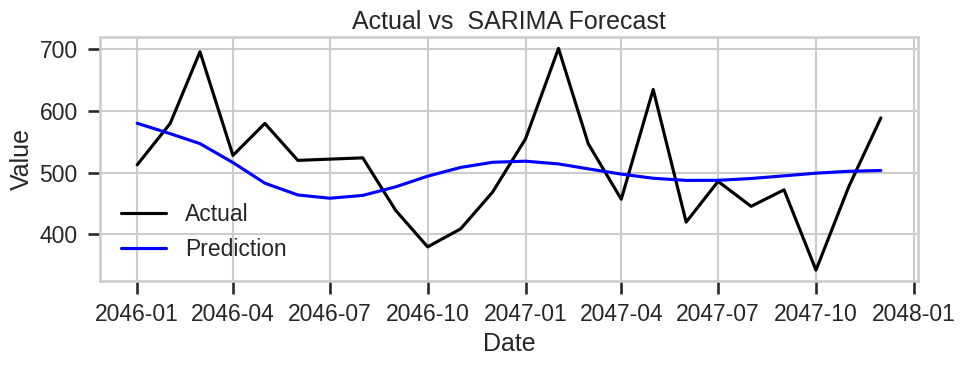

In [87]:
plt.figure(figsize=(10, 4))

plt.plot(test.index, test, label = 'Actual', color = 'black')
plt.plot(test.index, sari_pred, label = 'Prediction', color = 'blue')
plt.title('Actual vs  SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

#### ‚úÖ ÌÜµÍ≥ÑÎ¨∏Ï†ú
###### üìå ÏÑúÏö∏ÏóêÏÑú ÏòÅÎèôÍπåÏßÄ 100km/hÎ°ú Í∞ÄÍ≥† ÏòÅÎèôÏóêÏÑú ÏÑúÏö∏ÍπåÏßÄ 80km/Î°ú ÎèåÏïÑÏôîÏùÑ Îïå, ÌèâÍ∑† ÏÜçÎèÑÎäî

In [92]:
# Ï°∞Ìôî ÌèâÍ∑† : Í≥†Ï†ïÎêú Í±∞Î¶¨ÏóêÏÑú Î≥ÄÌôîÌïòÎäî ÏÜçÎèÑ - hmean
from scipy.stats.mstats  import gmean, hmean, tmean

data = [100, 80]
hmean(data)

88.88888888888889

In [99]:
#  üìå Ìïú ÌöåÏÇ¨ÏõêÏù¥ ÌöåÏÇ¨ Í∞àÎñÑ 3km Ìá¥Í∑ºÌï† Îïå 6kmÏù¥Î©¥ ÌèâÍ∑† ÏÜçÎèÑÎäî?
data = [6, 3]
hmean(data)

4.0

###### üìåÏó∞Îß§Ï∂úÏù¥ 3000, 4000, 5000Ïù¥ÏóàÎã§Î©¥ Ïó∞ÌèâÍ∑† Î™áÎ∞∞Í∞Ä Ï¶ùÍ∞ÄÌïú Í≤ÉÏù∏Í∞Ä?

In [96]:
# Ïó∞ÌèâÍ∑† Ï¶ùÍ∞Ä Î∞∞Ïàò = (ÎßàÏßÄÎßâ Í∞í / Ï≤òÏùå Í∞í) ** (1 / (Í∏∞Í∞Ñ Ïàò))
# Í∏∞Ìïò ÌèâÍ∑† : ÏÑ±Ïû•Î•† - gmean
data = [3000, 4000, 5000]

# 5000 / 3000
growth = data[-1] / data[0]

# 2ÎÖÑ
years = 2

# ÏÑ±Ïû•Î•†
((growth ** (1/years) ) - 1) * 100

29.09944487358056

In [113]:
#üìå Ïó∞ÌèâÍ∑† ÏÑ±Ïû•Î•†
#   2018  2019  2020  2021  2022
#   0.04  0.03  0.05  0.1   0.08

data = [0.04 , 0.03  ,0.05 , 0.1  , 0.08]

data2 = [1 + r for r in data]

(gmean(data2) -1 ) * 100

5.968127622257224

###### üìåÌëúÎ≥∏ 10Í∞úÏùò Î∂ÑÏÇ∞Ïù¥ 90Ïùº Îïå Ïã†Î¢∞ÎèÑ 95%Î°ú Î™®Î∂ÑÏÇ∞Ïùò Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ Ï∂îÏ†ï

In [115]:
from scipy import stats
n = 10
var = 90
confa = 0.05

# Î™®Î∂ÑÏÇ∞Ïùò Ïã†Î¢∞Íµ¨Í∞Ñ

df = n -1

cr1 = stats.chi2.ppf(1 - confa / 2, df)
cr2 = stats.chi2.ppf(confa / 2, df)


c1 = (df * var) / cr1
c2 = (df * var) / cr2

print(c1, c2)

42.58055444790953 299.95672846672363


‚úÖ ÌïµÏã¨ Í∞úÎÖê ÎπÑÍµê

      Î™®Î∂ÑÏÇ∞(œÉ¬≤) :	Ïπ¥Ïù¥Ï†úÍ≥± Î∂ÑÌè¨Î•º Ïù¥Ïö©Ìï¥ÏÑú ÏßÅÏ†ë Íµ¨Ìï®
      Î™®ÌëúÏ§ÄÌé∏Ï∞®(œÉ):	Î™®Î∂ÑÏÇ∞ Ïã†Î¢∞Íµ¨Í∞ÑÏùò Ï†úÍ≥±Í∑º(‚àö) ÏùÑ Ï∑®Ìï¥ÏÑú Íµ¨Ìï®

###### üìå Î≥ºÌä∏ÏôÄ ÎÑàÌä∏Î•º ÏÉùÏÇ∞ÌïòÎäî Í≥µÏû•ÏóêÏÑúÎäî Ï†úÌíàÏù¥ ÏñºÎßàÎÇò Í∑†ÏùºÌïúÏßÄ Î≥¥Í∏∞ ÏúÑÌï¥ 10Í∞úÏùò Î≥ºÌä∏Î•º Ï∂îÏ∂úÌïòÏó¨ ÏßÄÎ¶ÑÏùÑ Ï∏°Ï†ïÌïòÎãà ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 0.4ÏòÄÎã§. 90%Ïùò Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ Íµ¨ÌïòÎùº

In [122]:
# ÌëúÏ§ÄÌé∏Ï∞®Ïùò Ïã†Î¢∞Íµ¨Í∞Ñ
n = 10
s = 0.4
df = n- 1
conf = 0.1

cr1 = stats.chi2.ppf(conf /2, df)
cr2 = stats.chi2.ppf(1 - conf/2 , df)


lower = np.sqrt((df * s**2) / cr2)
upper = np.sqrt((df * s**2) / cr1)

print(lower, upper)


0.29173879732511404 0.6580790297576886


###### üìå5Î≤à Í≥µÏû• X,Y,ZÏùò ÌèâÍ∑† Ï∂úÌïò ÏÜåÏöîÏãúÍ∞ÑÏùÑ Ïó¨Îü¨ ÏùºÏûêÏóê Í±∞Ï≥ê Ï∏°Ï†ïÌïú Îç∞Ïù¥ÌÑ∞Ïù¥Îã§. Í∞Å Í≥µÏû•Ïùò Ï§ëÏúÑÏàòÏùò Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏

    5.1 Í∑ÄÎ¨¥Í∞ÄÏÑ§Í≥º Ïó∞Íµ¨Í∞ÄÏÑ§ÏùÑ Ï†úÏãúÌïòÏãúÏò§
    5.2 Í≤ÄÏ†ï ÌõÑ Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å Ïó¨Î∂Ä Ï†úÏãú

In [125]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
#len(df) ## 44Í∞ú
df.head()

Ï∂úÌïò ÏÜåÏöîÏãúÍ∞Ñ Í≥µÏû•Î™Ö  Í≥µÏû•Î≥Ñ Ï∂úÌïò ÏÜåÏöîÏãúÍ∞Ñ ÏàúÏúÑ
0       71   Z              11
1       75   X              14
2       71   X              12
3       53   Z               1
4       50   X               1

In [126]:

# Í∑ÄÎ¨¥Í∞ÄÏÑ§(H‚ÇÄ): Í≥µÏû• X, Y, ZÏùò Ï∂úÌïò ÏÜåÏöî ÏãúÍ∞ÑÏùò Ï§ëÏúÑÏàòÎäî ÏÑúÎ°ú Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.‚Äã
# Ïó∞Íµ¨Í∞ÄÏÑ§(H‚ÇÅ): Í≥µÏû• X, Y, ZÏùò Ï∂úÌïò ÏÜåÏöî ÏãúÍ∞ÑÏùò Ï§ëÏúÑÏàòÎäî ÏÑúÎ°ú Ï∞®Ïù¥Í∞Ä ÏûàÎã§.

array(['Z', 'X', 'Y'], dtype=object)

In [128]:
# Í∞Å Í≥µÏû•Ïùò Ï∂úÌïò ÏÜåÏöî ÏãúÍ∞Ñ Ï∂îÏ∂ú
x = df.loc[df['Í≥µÏû•Î™Ö'] =='X']['Ï∂úÌïò ÏÜåÏöîÏãúÍ∞Ñ']
y = df.loc[df['Í≥µÏû•Î™Ö'] =='Y']['Ï∂úÌïò ÏÜåÏöîÏãúÍ∞Ñ']
z = df.loc[df['Í≥µÏû•Î™Ö'] =='Z']['Ï∂úÌïò ÏÜåÏöîÏãúÍ∞Ñ']

# Kruskal-Wallis Í≤ÄÏ†ï ÏàòÌñâ
stat, p_value = kruskal(x, y, z)

print(f"Kruskal-Wallis ÌÜµÍ≥ÑÎüâ: {stat:.4f}")
print(f"p-Í∞í: {p_value:.4f}")

Kruskal-Wallis ÌÜµÍ≥ÑÎüâ: 0.7218
p-Í∞í: 0.6971
